# Merged model evaluation

In [2]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.functional_profiles as fp
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from scipy import stats
import glob
import numpy as np




/Users/callithrix/Documents/Projects/Functional_Fusion/code/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
files = sorted(
    glob.glob(f'{ut.model_dir}//Models/Evaluation/nettekoven_68/eval_*_existing.tsv'))

list_of_dfs = []
for f, file in enumerate(files):
    t = pd.read_csv(file, delimiter='\t')
    list_of_dfs.append(t)
    t['source'] = file.split('/')[-1].strip('.tsv')

D = pd.concat(list_of_dfs, ignore_index=True).reset_index(drop=True)
D.drop_duplicates(subset=D.columns.difference(['source']))

D.shape

(1266, 6)

In [8]:
D.head()


,fit_type,model_name,test_data,subj_num,dcbc,source
0,Models_03,asym_Md_space-MNISymC3_K-10,MDTB,0,0.098281,eval_on-task+rest_existing
1,Models_03,asym_Md_space-MNISymC3_K-10,MDTB,1,0.095214,eval_on-task+rest_existing
2,Models_03,asym_Md_space-MNISymC3_K-10,MDTB,2,0.049849,eval_on-task+rest_existing
3,Models_03,asym_Md_space-MNISymC3_K-10,MDTB,3,0.213206,eval_on-task+rest_existing
4,Models_03,asym_Md_space-MNISymC3_K-10,MDTB,4,0.090611,eval_on-task+rest_existing


In [9]:
D.tail()
D.model_name.unique()

array(['asym_Md_space-MNISymC3_K-10',
       'atl-Anatom_space-MNI152NLin2009cSymC_dseg',
       'atl-MDTB10_space-MNI152NLin2009cSymC_dseg',
       'atl-Buckner7_space-MNI152NLin2009cSymC_dseg',
       'atl-Buckner17_space-MNI152NLin2009cSymC_dseg',
       'atl-Ji10_space-MNI152NLin2009cSymC_dseg'], dtype=object)

In [14]:
crits = ['dcbc_group','dcbc_indiv']

                    

figsize = (10,10)
# Determine origin of model: clustered_in_C3 (and then refitted to C2), clustered (on C2 or C3 data, but not refitted to another space), data (pure data-driven model)
for r,row in D.iterrows():
    model_parts = row.model_name.split('_')
    space = row.model_name.split('space-')[1].strip('_')
    train_data = row.model_name.split('_space')[0]
    D.loc[r, 'atlas'] = space
    D.loc[r, 'train_data'] = train_data

# Determine whether model was trained on rest, task and rest, or task only
for r,row in D.iterrows():

    if 'atl-Anatom' == row['train_data']:
        D.loc[r, 'trained_on'] = 'anatomy'
    elif row['train_data'] in ['atl-Buckner7', 'atl-Buckner17', 'atl-Ji10']:
        D.loc[r, 'trained_on'] = 'rest'
    else:
        D.loc[r, 'trained_on'] = 'task'
        

# Determine whether model was tested on rest, task and rest, or task only
for r, row in D.iterrows():
    if 'HCP' == row['test_data']:
        D.loc[r, 'tested_on'] = 'rest'
    else:
        D.loc[r, 'tested_on'] = 'task'


D.tail()


,fit_type,model_name,test_data,subj_num,dcbc,source,atlas,train_data,trained_on,tested_on
1261,NaN,atl-Ji10_space-MNI152NLin2009cSymC_dseg,HCP,95,0.131517,eval_on-task+rest_existing,MNI152NLin2009cSymC_dseg,atl-Ji10,rest,rest
1262,NaN,atl-Ji10_space-MNI152NLin2009cSymC_dseg,HCP,96,0.147609,eval_on-task+rest_existing,MNI152NLin2009cSymC_dseg,atl-Ji10,rest,rest
1263,NaN,atl-Ji10_space-MNI152NLin2009cSymC_dseg,HCP,97,0.128097,eval_on-task+rest_existing,MNI152NLin2009cSymC_dseg,atl-Ji10,rest,rest
1264,NaN,atl-Ji10_space-MNI152NLin2009cSymC_dseg,HCP,98,0.208120,eval_on-task+rest_existing,MNI152NLin2009cSymC_dseg,atl-Ji10,rest,rest
1265,NaN,atl-Ji10_space-MNI152NLin2009cSymC_dseg,HCP,99,0.150397,eval_on-task+rest_existing,MNI152NLin2009cSymC_dseg,atl-Ji10,rest,rest


### Comparing pure task-trained, rest-and-task-trained, and rest-trained parcellations

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_6741/1561304122.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  D.groupby(['train_data']).mean()


,subj_num,dcbc
train_data,,
asym_Md,29.14218,0.092622
atl-Anatom,29.14218,0.060794
atl-Buckner17,29.14218,0.120216
atl-Buckner7,29.14218,0.118020
atl-Ji10,29.14218,0.115439
atl-MDTB10,29.14218,0.094496


<Figure size 1000x1000 with 0 Axes>

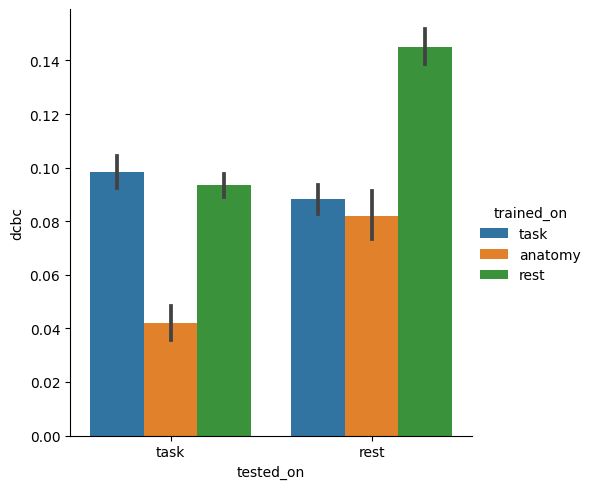

In [20]:

plt.figure(figsize=figsize)
sb.catplot(
    data=D, x="tested_on", y="dcbc", hue="trained_on", kind="bar")

D.groupby(['train_data']).mean()


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_6741/2653598859.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  D.groupby(['train_data', 'tested_on']).mean()


subj_num      dcbc
train_data    tested_on                     
asym_Md       rest       49.500000  0.087144
              task       10.801802  0.097556
atl-Anatom    rest       49.500000  0.081801
              task       10.801802  0.041868
atl-Buckner17 rest       49.500000  0.145702
              task       10.801802  0.097257
atl-Buckner7  rest       49.500000  0.142929
              task       10.801802  0.095579
atl-Ji10      rest       49.500000  0.146580
              task       10.801802  0.087383
atl-MDTB10    rest       49.500000  0.089165
              task       10.801802  0.099298

<Figure size 1000x1000 with 0 Axes>

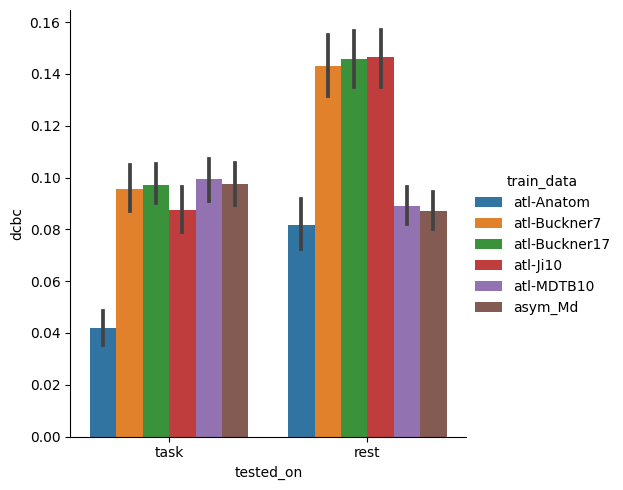

In [30]:

plt.figure(figsize=figsize)
sb.catplot(
    data=D, x="tested_on", y="dcbc", hue="train_data", kind="bar", hue_order=['atl-Anatom', 'atl-Buckner7', 'atl-Buckner17', 'atl-Ji10', 'atl-MDTB10', 'asym_Md'])

D.groupby(['train_data', 'tested_on']).mean()


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_6741/3095851841.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  D.groupby(['train_data']).mean()


,subj_num,dcbc
train_data,,
asym_Md,29.14218,0.092622
atl-Anatom,29.14218,0.060794
atl-Buckner17,29.14218,0.120216
atl-Buckner7,29.14218,0.118020
atl-Ji10,29.14218,0.115439
atl-MDTB10,29.14218,0.094496


<Figure size 1000x1000 with 0 Axes>

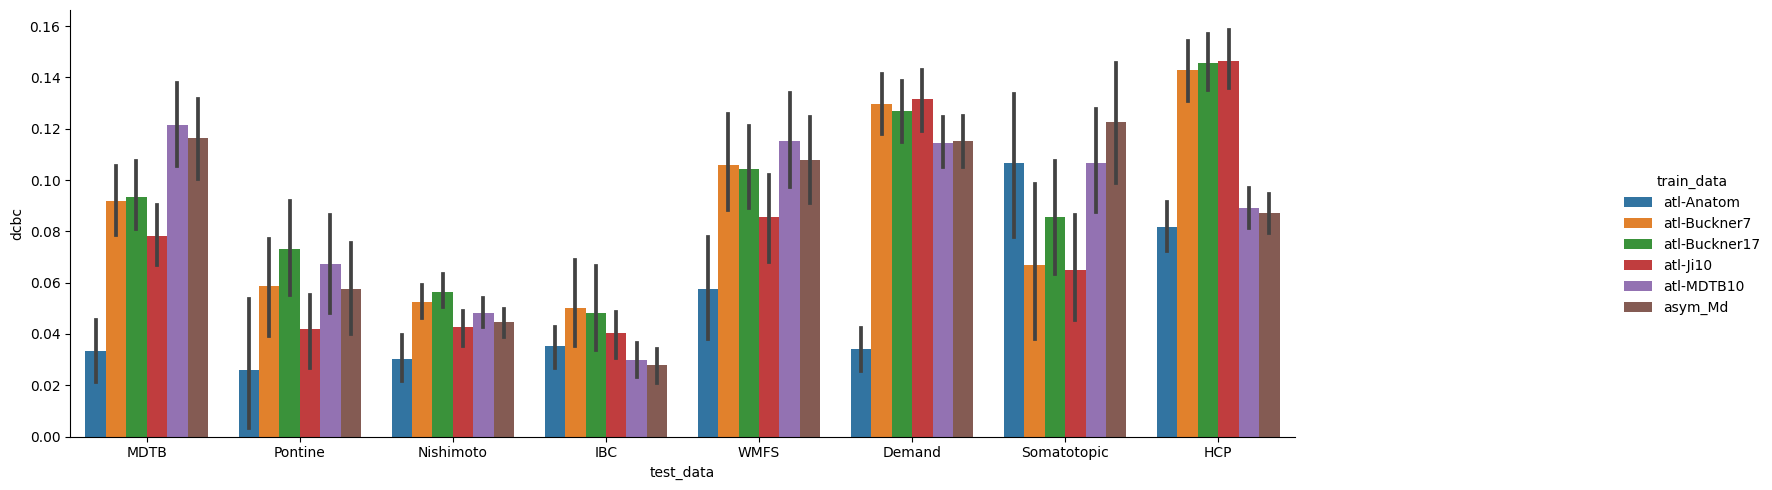

In [28]:

plt.figure(figsize=figsize)
g = sb.catplot(
    data=D, x="test_data", y="dcbc", hue="train_data", kind="bar", hue_order=['atl-Anatom', 'atl-Buckner7', 'atl-Buckner17', 'atl-Ji10', 'atl-MDTB10', 'asym_Md'])
g.fig.set_size_inches(20, 5)

D.groupby(['train_data']).mean()


<Figure size 1000x1000 with 0 Axes>

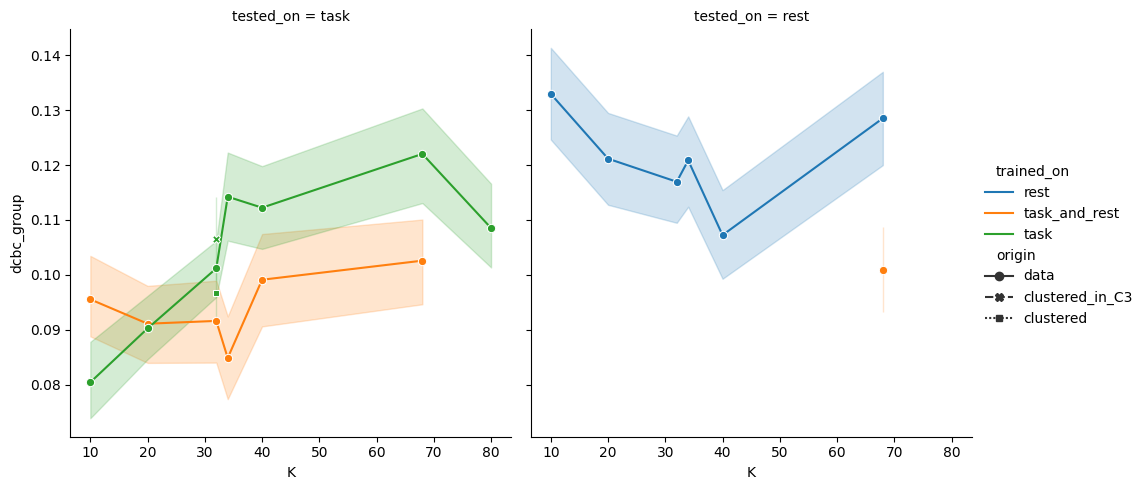

<Figure size 1000x1000 with 0 Axes>

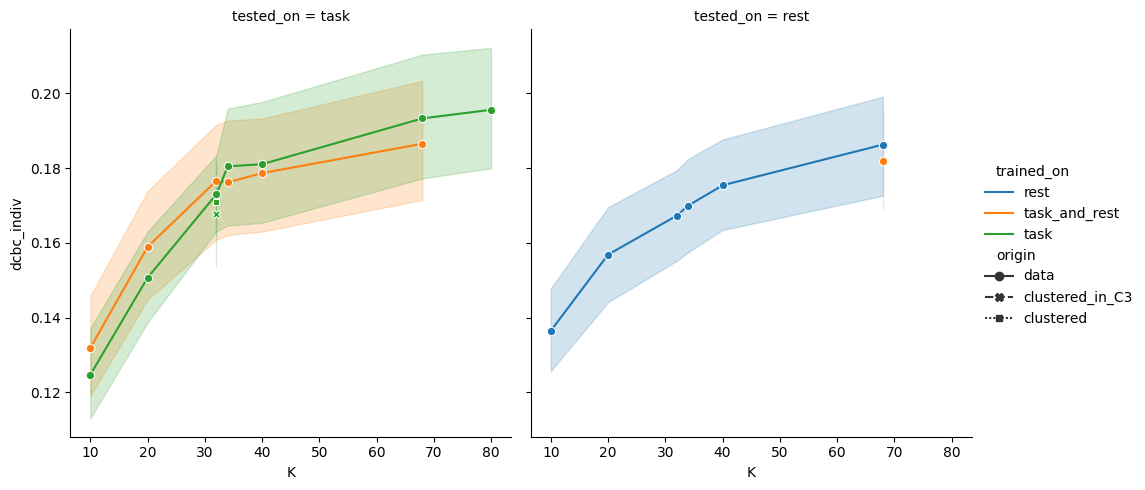

In [49]:

plt.figure(figsize=figsize)
sb.relplot(
    data=D[D.cv == False], x="K", y="dcbc_group", col="test_data", hue="trained_on", kind="line", col_order=['task', 'rest'], style="origin", markers=True)

plt.figure(figsize=figsize)
sb.relplot(
    data=D[D.cv == False], x="K", y="dcbc_indiv", col="test_data", hue="trained_on", kind="line", col_order=['task', 'rest'], style="origin", markers=True)


In [83]:
ex = pd.read_csv(f'{ut.model_dir}/Models/Evaluation/eval_all_5existing_on_taskDatasets.tsv', sep='\t')

# Cross-validation indicator
for r, row in ex.iterrows():
    train_test_match = row.train_data[:-2] in row.test_data
    if np.any(train_test_match):
        ex.loc[r, 'cv'] = False
    else:
        ex.loc[r, 'cv'] = True

ex.head()


,model_name,atlas,K,train_data,train_loglik,subj_num,common_kappa,dcbc_group,dcbc_indiv,model_type,test_sess,indivtrain_ind,indivtrain_val,test_data,cv
0,Anatom,MNISymC3,30,Anatom,NaN,0,NaN,0.062665,NaN,Anatom,all,half,1,MDTB,True
1,Anatom,MNISymC3,30,Anatom,NaN,1,NaN,0.030371,NaN,Anatom,all,half,1,MDTB,True
2,Anatom,MNISymC3,30,Anatom,NaN,2,NaN,-0.013567,NaN,Anatom,all,half,1,MDTB,True
3,Anatom,MNISymC3,30,Anatom,NaN,3,NaN,0.096046,NaN,Anatom,all,half,1,MDTB,True
4,Anatom,MNISymC3,30,Anatom,NaN,4,NaN,0.018923,NaN,Anatom,all,half,1,MDTB,True


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_19787/486138657.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ex.groupby(['train_data', 'cv']).mean()
Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1134, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 311, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/Users/callithrix/Documents/Projects/Functional_Fusion/code/env/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2062, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/Users/callithrix/Documents/Projects/Functional_Fusion/code/env/lib/python3.9/site-package

KeyboardInterrupt: 

<Figure size 1000x1000 with 0 Axes>

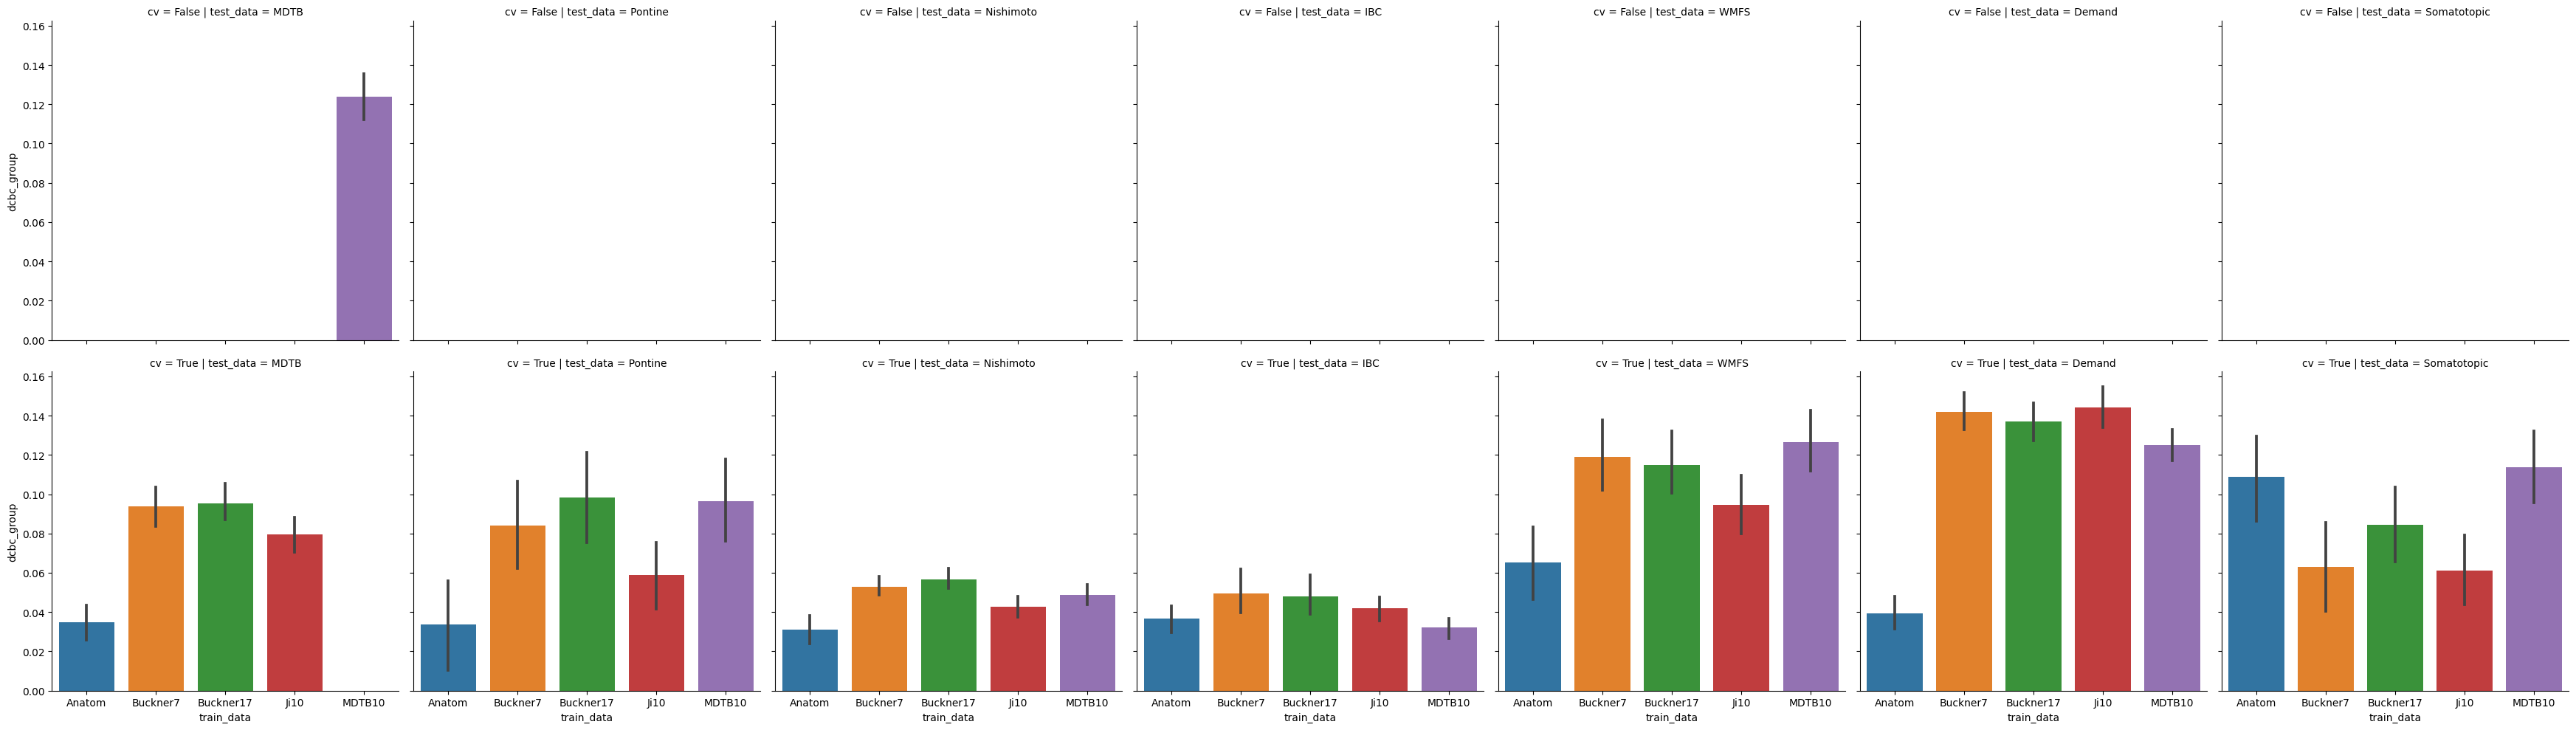

In [95]:

plt.figure(figsize=figsize)
sb.catplot(
    data=ex, x="train_data", y="dcbc_group", col="test_data",  kind="bar", row="cv")
ex.groupby(['train_data', 'cv']).mean()






<Figure size 1000x1000 with 0 Axes>

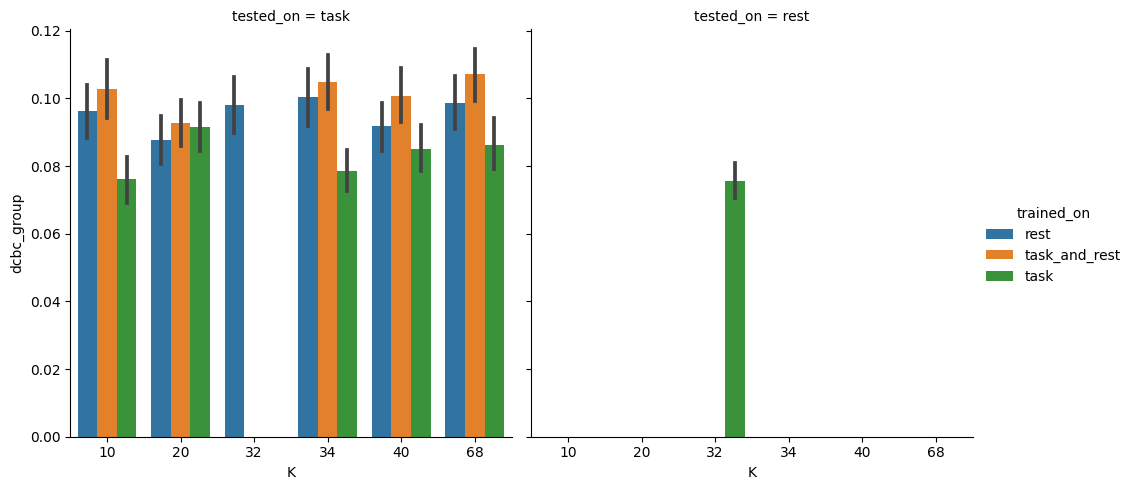

In [62]:

plt.figure(figsize=figsize)
sb.catplot(
    data=D[(D.cv == True) ], x="K", y="dcbc_group", col="tested_on",  hue="trained_on", kind="bar", col_order=['task', 'rest'])


### Comparing merged K 32 and data-derived K 34